# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [ ]:
import requests
u = "http://news.ycombinator.com/"
s = requests.get(u).content.decode('utf-8')
s[:30]

'<html lang="en" op="news"><hea'

In [ ]:
import re
import pandas as pd

In [ ]:
r = re.compile(r'(?<=titlelink">).*?(.*?)<')
titles=pd.Series(r.findall(s.replace("\r","").replace("\n","")))
#
#r = re.compile(r'(?<=<a href="item?id=\d">).*?(.*?)nbsp')
r = re.compile(r'\d{1,2}(?=&nbsp)')
votes=pd.Series(r.findall(s.replace("\r","").replace("\n",""))).astype(int)
print(f"len(votes)= {len(votes)}")
print(f"len(titles)= {len(titles)}")
print(votes.iloc[:10])
print(titles.iloc[:10])


len(votes)= 27
len(titles)= 27
0    22
1    34
2    10
3    38
4    21
5    44
6     7
7    96
8    11
9    14
dtype: int64
0                             Get Started Making Music
1    Substantially more monarch butterflies have ar...
2    Apple’s Privacy Changes Hurt Snap and Facebook...
3    Chan Zuckerberg Initiative sunsetting science ...
4                                  Awesome Userscripts
5                       Fundamentals of Piano Practice
6                                    colorForth (2009)
7    How long does it take ordinary people to “get ...
8                               Explaining Ruby Fibers
9    I converted my microwave into a laser oven [vi...
dtype: object


**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
!pip install tmdbv3api
import tmdbv3api

In [ ]:
from tmdbv3api import TMDb
tmdb = TMDb()
tmdb.api_key = 'my key'

In [ ]:
from tmdbv3api import Movie
movie = Movie()
search = movie.search('James Bond')


for i, res in enumerate(search):
    print(res.id)
    print(res.title)
    print(res.overview)
    print(res.poster_path)
    print(res.vote_average)
    if i==4: break

869250
Being James Bond
Daniel Craig candidly reflects on his 15 year adventure as James Bond. Including never-before-seen archival footage from Casino Royale to the upcoming 25th film No Time To Die, Craig shares his personal memories in conversation with 007 producers, Michael G Wilson and Barbara Broccoli.
/kKG9gieki5wgEcVXLfnX1lbOcrO.jpg
7.1
338749
James Bond: For Real
The stunts and action set pieces for the the 2006 James Bond adventure 'Casino Royale'.
/vYNYCv3LrZjRvQaFTm5HnZVCIut.jpg
7.3
822110
Daniel Craig vs James Bond
Starting with a high-speed taxi sequence, Daniel is constantly recognized as James Bond by surprised locals as he hunts down his missing passport.
/7hknQnJPd5lfrW1QFJUxmSxp3e4.jpg
7
368155
Happy Anniversary 007: 25 Years of James Bond
An hour documentary on the history of Bond for the 25th anniversary of the film series.
/mVeyZnJBNXFX6C02Hya1ZahH3xH.jpg
6.3
44650
The James Bond Story
Bond... James Bond! Perhaps the greatest fictional cinema icon ever. He first 

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "203837695"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 3 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

In [ ]:
import json
import os
!pip install kaggle 
api_token = {"username":"amirbialer","key":"f2af62d43f0aaf0ee3bea5998634a1b7"}
!mkdir /root/.kaggle/
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
!mkdir ./datasets
!mkdir ./datasets/kickstarter
!kaggle datasets download -d kemical/kickstarter-projects -f ks-projects-201801.csv -p ./datasets/kickstarter/
!unzip ./datasets/kickstarter/*.zip  -d ./datasets/kickstarter/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
 83% 17.0M/20.4M [00:00<00:00, 11.2MB/s]
100% 20.4M/20.4M [00:00<00:00, 24.7MB/s]
Archive:  ./datasets/kickstarter/ks-projects-201801.csv.zip
  inflating: ./datasets/kickstarter/ks-projects-201801.csv  


In [ ]:
df=pd.read_csv("/content/datasets/kickstarter/ks-projects-201801.csv")
df.iloc[:2]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [ ]:
df["date"]=pd.to_datetime(df["launched"])
df["month"]=[dt.month for dt in df["date"]]
df=df.groupby("month").count()["name"].sort_values().reset_index().rename(columns={"name":"count"})
df

,month,count
0,12,23263
1,1,27840
2,2,29732
3,9,31069
4,4,32260
5,8,32291
6,6,32622
7,5,32888
8,11,32889
9,10,33490


In December

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

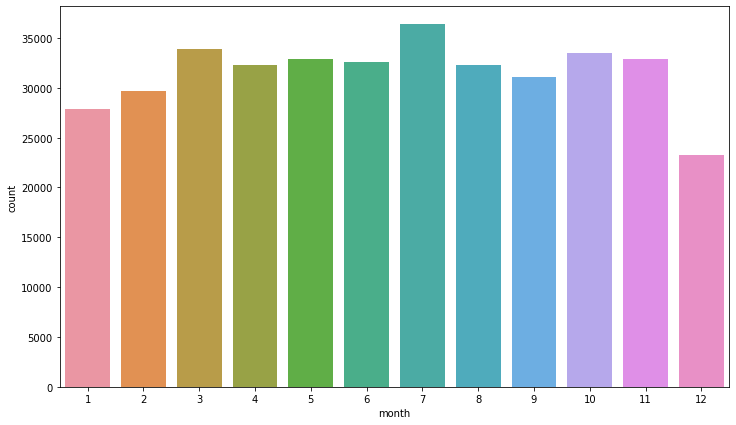

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots(figsize=(12,7))
c=sns.barplot(data=df, x="month", y="count",ax=ax)

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [ ]:
!mkdir ./datasets/marvel
!kaggle datasets download -d csanhueza/the-marvel-universe-social-network -p ./datasets/marvel/
!unzip ./datasets/marvel/*.zip  -d ./datasets/marvel/

mkdir: cannot create directory ‘./datasets/marvel’: File exists
the-marvel-universe-social-network.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/marvel/the-marvel-universe-social-network.zip
  inflating: ./datasets/marvel/edges.csv  
  inflating: ./datasets/marvel/hero-network.csv  
  inflating: ./datasets/marvel/nodes.csv  


In [ ]:
df=pd.read_csv("/content/datasets/marvel/hero-network.csv")
df.iloc[:2]

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [ ]:
#adding the opposite relationship and the counting unique values
con=pd.concat([df,pd.DataFrame({"hero1":df["hero2"], "hero2":df["hero1"]})])
gr=con.groupby("hero1").nunique()["hero2"].sort_values(ascending=False).reset_index().rename(columns={"hero1":"hero", "hero2":"number of friends"})
gr["number of friends"]-=1 #deleting self count
gr[:10]
#the fact the some numbers are odd ensures us we didn't count doubles

,hero,number of friends
0,CAPTAIN AMERICA,1906
1,SPIDER-MAN/PETER PAR,1736
2,IRON MAN/TONY STARK,1521
3,THING/BENJAMIN J. GR,1415
4,MR. FANTASTIC/REED R,1378
5,WOLVERINE/LOGAN,1370
6,HUMAN TORCH/JOHNNY S,1360
7,SCARLET WITCH/WANDA,1324
8,THOR/DR. DONALD BLAK,1288
9,BEAST/HENRY &HANK& P,1266


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [ ]:
!pip install networkx
import networkx as nx
import numpy as np
import matplotlib

In [ ]:
heros150=con.groupby("hero1").nunique()["hero2"].sort_values(ascending=False)[:150].index.values
small_df=df.loc[np.logical_and(df["hero1"].isin( heros150) ,df["hero2"].isin(heros150))].drop_duplicates()
small_df=small_df.loc[small_df["hero1"]!=small_df["hero2"]]

In [ ]:
#con2=pd.concat([small_df,pd.DataFrame({"hero1":small_df["hero2"], "hero2":small_df["hero1"]})])
#con2.groupby("hero1").nunique()["hero2"].sort_values(ascending=False).reset_index().rename(columns={"hero1":"hero", "hero2":"number of friends"})
nodes=pd.read_csv("/content/datasets/marvel/nodes.csv")


In [ ]:
g=nx.Graph()
edge_list=[(row["hero1"],row["hero2"]) for i,row in small_df.iterrows()]
g.add_edges_from(edge_list)
deg = dict(g.degree)
n=pd.DataFrame({"node":deg.keys()})
type_list=nodes.merge(n,on="node", how="right")
type_list['type'] = pd.Categorical(type_list['type'])
type_list['type'].cat.codes


0      1
1     -1
2      1
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int8

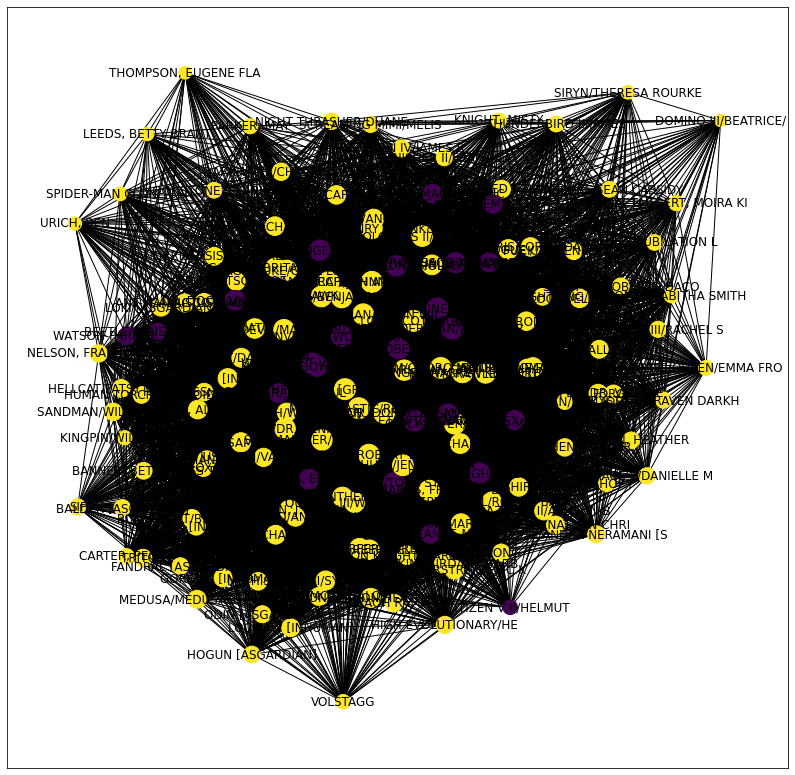

In [ ]:
plt.figure(3,figsize=(14,14))
pos = nx.spring_layout(g)

nx.draw_networkx(g, node_size=[v*3 for v in deg.values()], node_color=type_list['type'].cat.codes, pos=pos)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)